# 1st iteration: our dummy model

In [64]:
import pandas as pd
titanic = pd.read_csv('./train.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data quality check

### Missing values

In [66]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Duplicated rows

In [67]:
titanic.duplicated().sum()

0

## Basic exploration

In [68]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [69]:
titanic.groupby(['Sex','Survived']).agg(count = ('Survived','count'))

count
Sex    Survived       
female 0            81
       1           233
male   0           468
       1           109

## Create our dummy model ("Train")

In [70]:
def my_dummy_model(sex): 
    if sex == 'female': 
        return 1
    elif sex == 'male':
        return 0

titanic['preds'] = [my_dummy_model(sex) for sex in titanic['Sex']]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,preds
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Evaluate my model

Let's take a look at the two columns we want to compare:

In [71]:
error_check = titanic.filter(['Survived','preds']).assign(check = lambda x: x['Survived'] == x['preds'])
error_check.sample(10)

,Survived,preds,check
781,1,1,True
808,0,0,True
868,0,0,True
494,0,0,True
315,1,1,True
379,0,0,True
32,1,1,True
578,0,1,False
287,0,0,True
774,1,1,True


In [72]:
# total number of correct answers
error_check['check'].sum()

701

In [73]:
# accuracy of our model is: 
error_check['check'].sum() / error_check.shape[0]

0.7867564534231201

In [74]:
titanic.drop(columns=['preds'], inplace=True)

In [75]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
521,3,male,22.0,0,0,7.8958,S
753,3,male,23.0,0,0,7.8958,S
643,3,male,NaN,0,0,56.4958,S
332,1,male,38.0,0,1,153.4625,S
743,3,male,24.0,1,0,16.1000,S
...,...,...,...,...,...,...,...
136,1,female,19.0,0,2,26.2833,S
133,2,female,29.0,1,0,26.0000,S
361,2,male,29.0,1,0,27.7208,C
340,2,male,2.0,1,1,26.0000,S


We are following a wrong approach at creating this model, as we will have to split our data into a training and a testing. 

# 2nd iteration: creating train and test

## Split the dataset

In [12]:
from sklearn.model_selection import train_test_split

X = titanic.drop(columns=['Survived'])
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

## Short exploration

In [13]:
(
    X_train
    .assign(Survived = y_train)
    .groupby(['Sex','Survived'])
    .agg(count = ('Survived','count'))
    )

count
Sex    Survived       
female 0            59
       1           179
male   0           351
       1            79

Based on this quick analyisis, we can apply the same model as before. 

## Test our model

In [14]:
# Let's predict if someone will have survived or not with my dummy mdoel
X_train['preds'] = [my_dummy_model(sex) for sex in X_train['Sex']]
X_test['preds'] = [my_dummy_model(sex) for sex in X_test['Sex']]

Finding the accuracy for our train and test set:

In [15]:
# results train data
(
    pd.DataFrame({
        'Survived':y_train,
        'preds':[my_dummy_model(sex) for sex in X_train['Sex']]
        })
    .assign(check = lambda x: x['Survived'] == x['preds'])['check']
    .sum()
) / len(y_train)

0.7934131736526946

In [16]:
# results train data
acc_2nd = (
    pd.DataFrame({
        'Survived':y_test,
        'preds':[my_dummy_model(sex) for sex in X_test['Sex']]
        })
    .assign(check = lambda x: x['Survived'] == x['preds'])['check']
    .sum()
) / len(y_test)
acc_2nd

0.7668161434977578

# 3rd iteration: our first scikit-learning model

Time to create our first model, a decision tree. We are going only to use the column *Sex* as a predictor:

In [17]:
X = titanic.filter(['Sex'])
y = titanic.filter(['Survived'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

## Pre process your data

How to transform a categorical variable into a numeric variable?

### With `pandas`

In [18]:
pd.get_dummies(X_train).head()

,Sex_female,Sex_male
521,0,1
753,0,1
643,0,1
332,0,1
743,0,1


### With `sklearn`

In [19]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first', sparse=False) # handle_unknown='ignore'
enc.fit(X_train)

OneHotEncoder(drop='first', sparse=False)

In [20]:
# printing the category names
# as we know we have specified `drop='first'`, we are going only to keep
# the category male, which is in the 2nd positions of the array
enc.get_feature_names()[0]

'x0_male'

In [21]:
X_train_enc = enc.transform(X_train)
X_train_enc = pd.DataFrame(X_train_enc, columns=list(enc.get_feature_names()))
X_train_enc.head()

,x0_male
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


## Train our model

In [22]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_enc, y_train)

DecisionTreeClassifier()

### Visualise our model

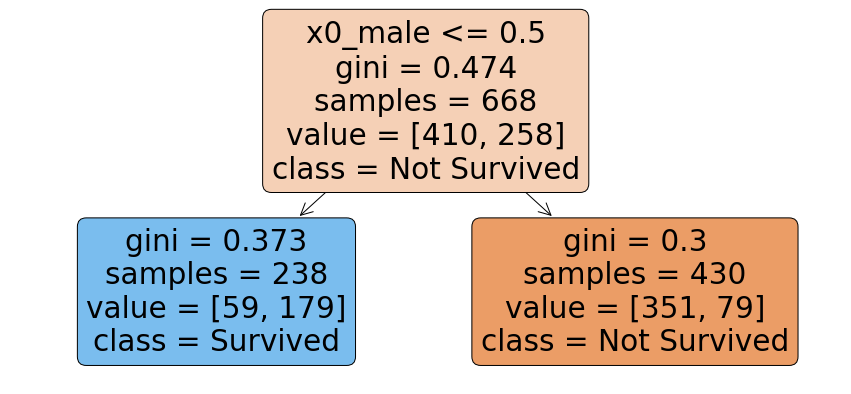

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 7))
plot_tree(
    tree,
    filled=True, 
    rounded=True, 
    class_names=['Not Survived','Survived'], 
    feature_names=X_train_enc.columns
    );

## Test our model

### Check the metrics on train

In [24]:
# check the accuracy
from sklearn.metrics import accuracy_score
preds = tree.predict(X_train_enc)
accuracy_score(preds, y_train)

0.7934131736526946

This is the same accuracy we got on the 2nd iteration, where we have created a dummy model with our own function (accuracy 2nd iteration was 0.7965653896961691)

### Metrics on test

In [25]:
# 1st we need to transform this metrics
X_test_enc = pd.DataFrame(enc.transform(X_test), columns=list(enc.get_feature_names()))
# time to predict 
preds = tree.predict(X_test_enc)
acc_3rd = accuracy_score(preds, y_test)
acc_3rd

0.7668161434977578

Same results as we got on the 2nd iteration: 0.7313432835820896

#### Confusion matrix

Another way to visualise our errors is to use a confusion matrix:

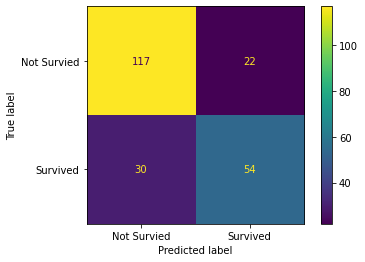

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree, X_test_enc, y_test, display_labels=['Not Survied', 'Survived']);

Observations: 

* Total Not Survived: `65 + 18 = 83`. 
* Total Survived: `18 + 33 = 51`. 
* Not Survived correctly classified: `65` (`65 / 83 = 0.78` -> 78% over the total not survived people). 
* Survived correclty classified: `33` (`33 / 51 = 0.65` -> 65% over the total survived people).

In [62]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
521,3,male,22.0,0,0,7.8958,S
753,3,male,23.0,0,0,7.8958,S
643,3,male,NaN,0,0,56.4958,S
332,1,male,38.0,0,1,153.4625,S
743,3,male,24.0,1,0,16.1000,S
...,...,...,...,...,...,...,...
136,1,female,19.0,0,2,26.2833,S
133,2,female,29.0,1,0,26.0000,S
361,2,male,29.0,1,0,27.7208,C
340,2,male,2.0,1,1,26.0000,S


# 4th iteration: more features + missing values preprocessing

Our goal is to use the power of decision trees to train our model with more variables. Now that we know how to introduce categorical variables into it, let's add more information in our model:

## Feature selection 

Let's decide which variables we think are important to predict if someone has survived or not to this disaster:

In [27]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
821,822,1,3,"Lulic, Mr. Nikola",male,27.0,0,0,315098,8.6625,NaN,S
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q


In [28]:
X = titanic.drop(columns=['Name','Ticket','Cabin','PassengerId','Survived'])
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
768,3,male,NaN,1,0,24.1500,Q
387,2,female,36.0,0,0,13.0000,S
823,3,female,27.0,0,1,12.4750,S
778,3,male,NaN,0,0,7.7375,Q
157,3,male,30.0,0,0,8.0500,S


## Preprocess

### Missing values

In [29]:
X_train.isna().sum()

Pclass        0
Sex           0
Age         142
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

#### Age missing values

Define numerical variables: 
* Age : Age in years
* SibSp : # of siblings / spouses aboard the Titanic
* Parch : # of parents / children aboard the Titanic
* Fare : Passenger fare

In [30]:
# define numeric columns
num_col = ['Age','Fare','SibSp','Parch']

from sklearn.impute import SimpleImputer
# define missing values imputer strategy
imp_num = SimpleImputer(strategy="median")

X_train[num_col] = imp_num.fit_transform(X_train[num_col])
X_test[num_col] = imp_num.transform(X_test[num_col])
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

#### Embarked missing values


Categorical variables: 

* Pclass : 	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* Sex
* Embarked : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [31]:
cat_col = ['Pclass','Sex','Embarked']

imp_cat = SimpleImputer(strategy='most_frequent')

X_train[cat_col] = imp_cat.fit_transform(X_train[cat_col])
X_test[cat_col] = imp_cat.transform(X_test[cat_col])
X_train.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Encoding variables

In [32]:
enc = OneHotEncoder(
    drop='first',
    sparse=False
    )
X_train_enc = enc.fit_transform(X_train[cat_col])
X_test_enc = enc.transform(X_test[cat_col])

# modify X_train
X_train_enc = pd.DataFrame(X_train_enc, columns=list(enc.get_feature_names()), index=X_train.index)

X_train = pd.concat([X_train, X_train_enc], axis=1, ignore_index=False).drop(columns=cat_col)
X_train.head()

,Age,SibSp,Parch,Fare,x0_2,x0_3,x1_male,x2_Q,x2_S
768,29.0,1.0,0.0,24.1500,0.0,1.0,1.0,1.0,0.0
387,36.0,0.0,0.0,13.0000,1.0,0.0,0.0,0.0,1.0
823,27.0,0.0,1.0,12.4750,0.0,1.0,0.0,0.0,1.0
778,29.0,0.0,0.0,7.7375,0.0,1.0,1.0,1.0,0.0
157,30.0,0.0,0.0,8.0500,0.0,1.0,1.0,0.0,1.0


In [33]:
X_test_enc = pd.DataFrame(X_test_enc, columns=list(enc.get_feature_names()), index=X_test.index)
X_test_enc
X_test = pd.concat([X_test, X_test_enc], axis=1, ignore_index=False).drop(columns=cat_col)
X_test.head()

,Age,SibSp,Parch,Fare,x0_2,x0_3,x1_male,x2_Q,x2_S
350,23.0,0.0,0.0,9.2250,0.0,1.0,1.0,0.0,1.0
176,29.0,3.0,1.0,25.4667,0.0,1.0,1.0,0.0,1.0
723,50.0,0.0,0.0,13.0000,1.0,0.0,1.0,0.0,1.0
404,20.0,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0
306,29.0,0.0,0.0,110.8833,0.0,0.0,0.0,0.0,0.0


## Training model

In [34]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Plot our tree

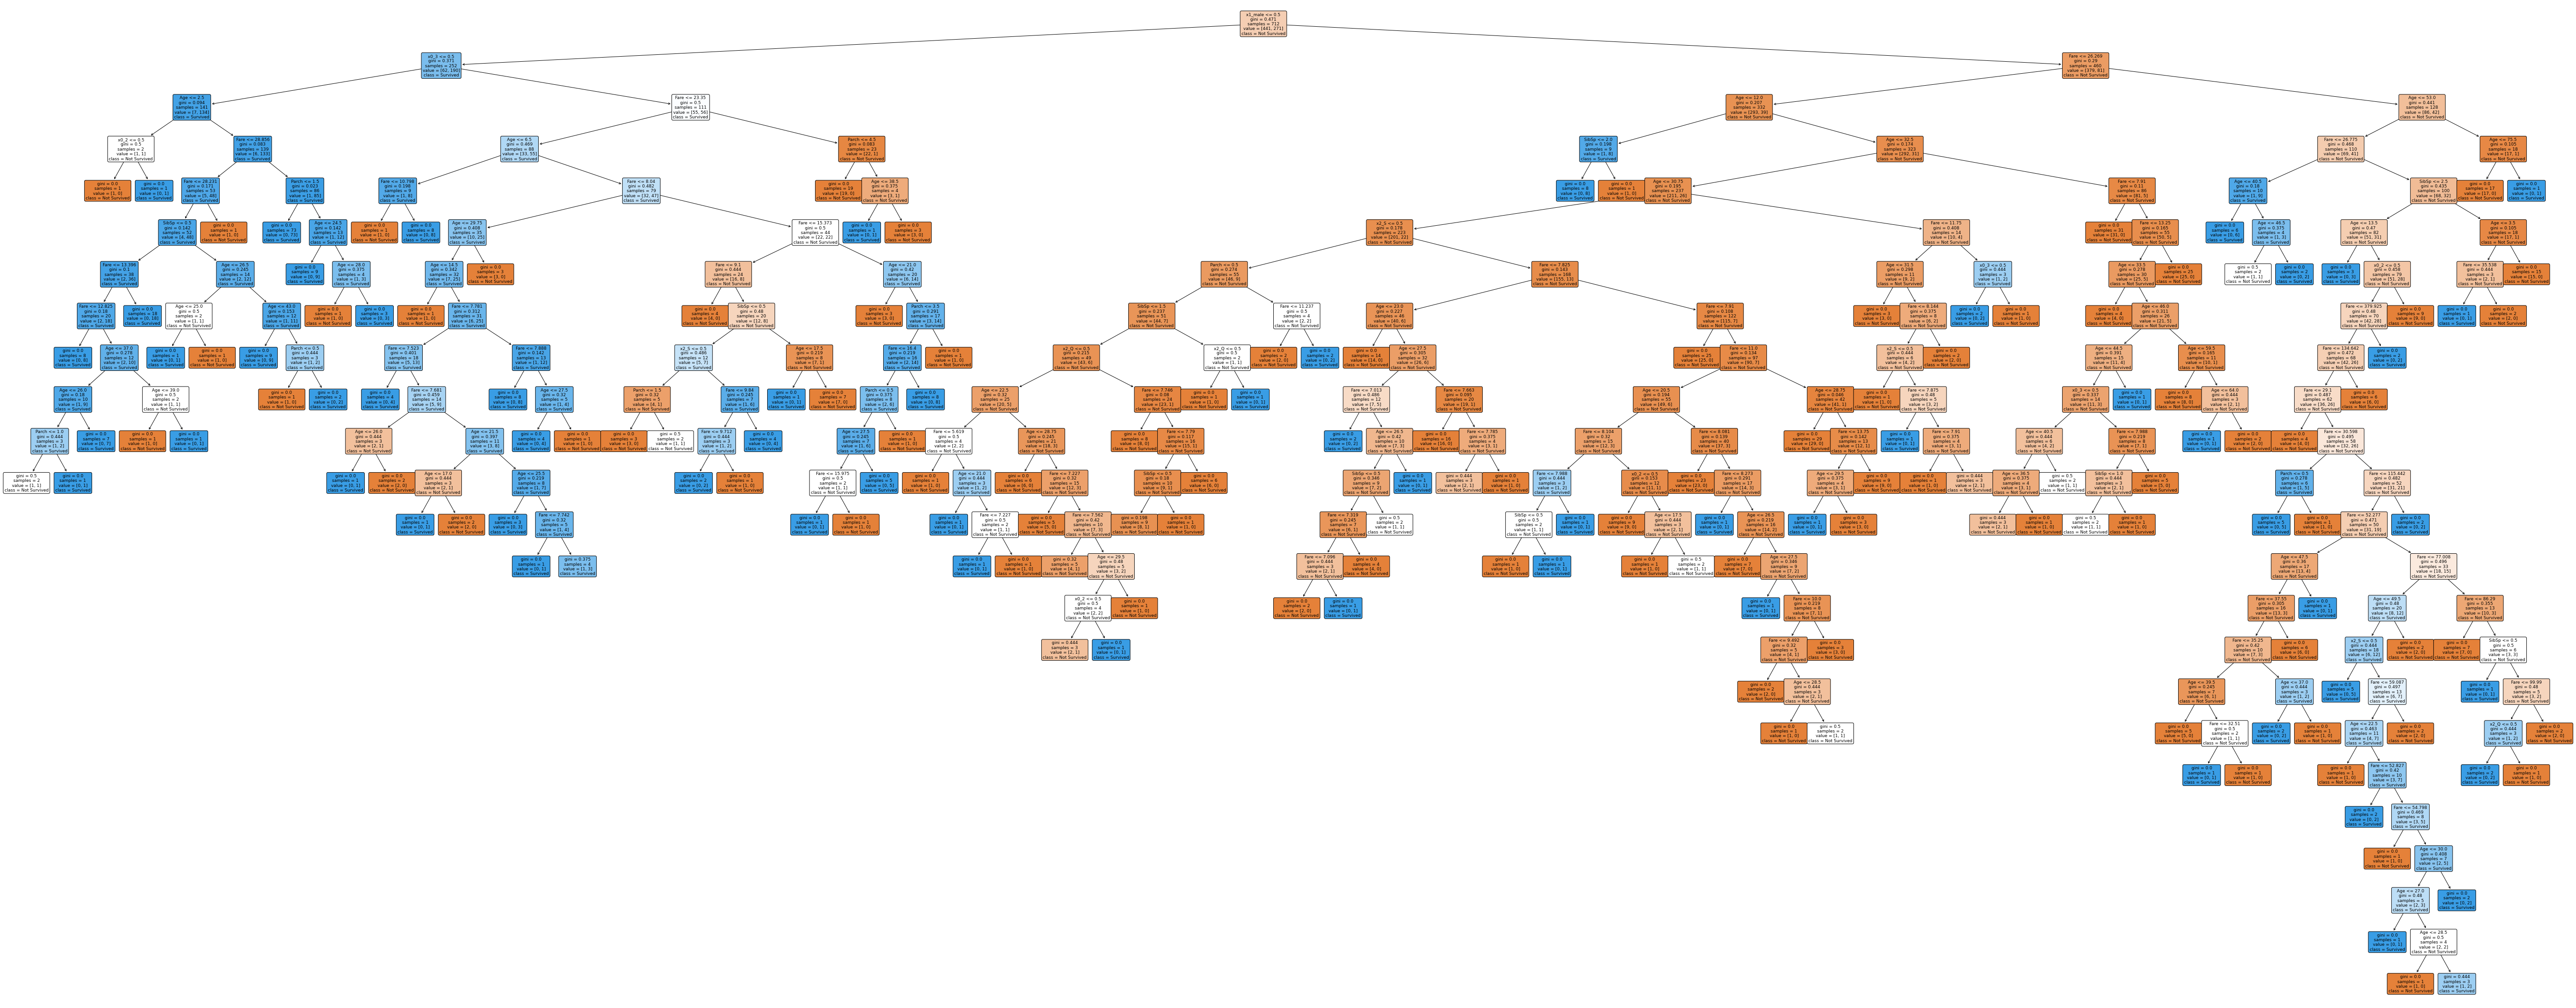

In [35]:
plt.figure(figsize=(100, 40))
plot_tree(
    tree,
    filled=True, 
    rounded=True, 
    class_names=['Not Survived', 'Survived'], 
    feature_names=X_train.columns
    );

## Test our model

In [36]:
# accuracy in train set
preds = tree.predict(X_train)
accuracy_score(preds, y_train)

0.9775280898876404

In [37]:
# accuracy in test set
preds = tree.predict(X_test)
acc_4th = accuracy_score(preds, y_test)
acc_4th

0.7821229050279329

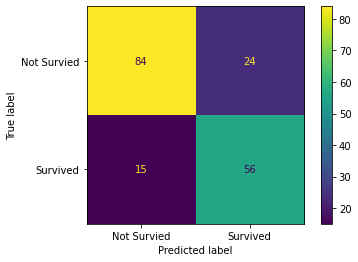

In [38]:
# confusion matrix
plot_confusion_matrix(tree, X_test, y_test, display_labels=['Not Survied', 'Survived']);

# 5th iteration: prunning the tree

## Train our model with a max depth of 3

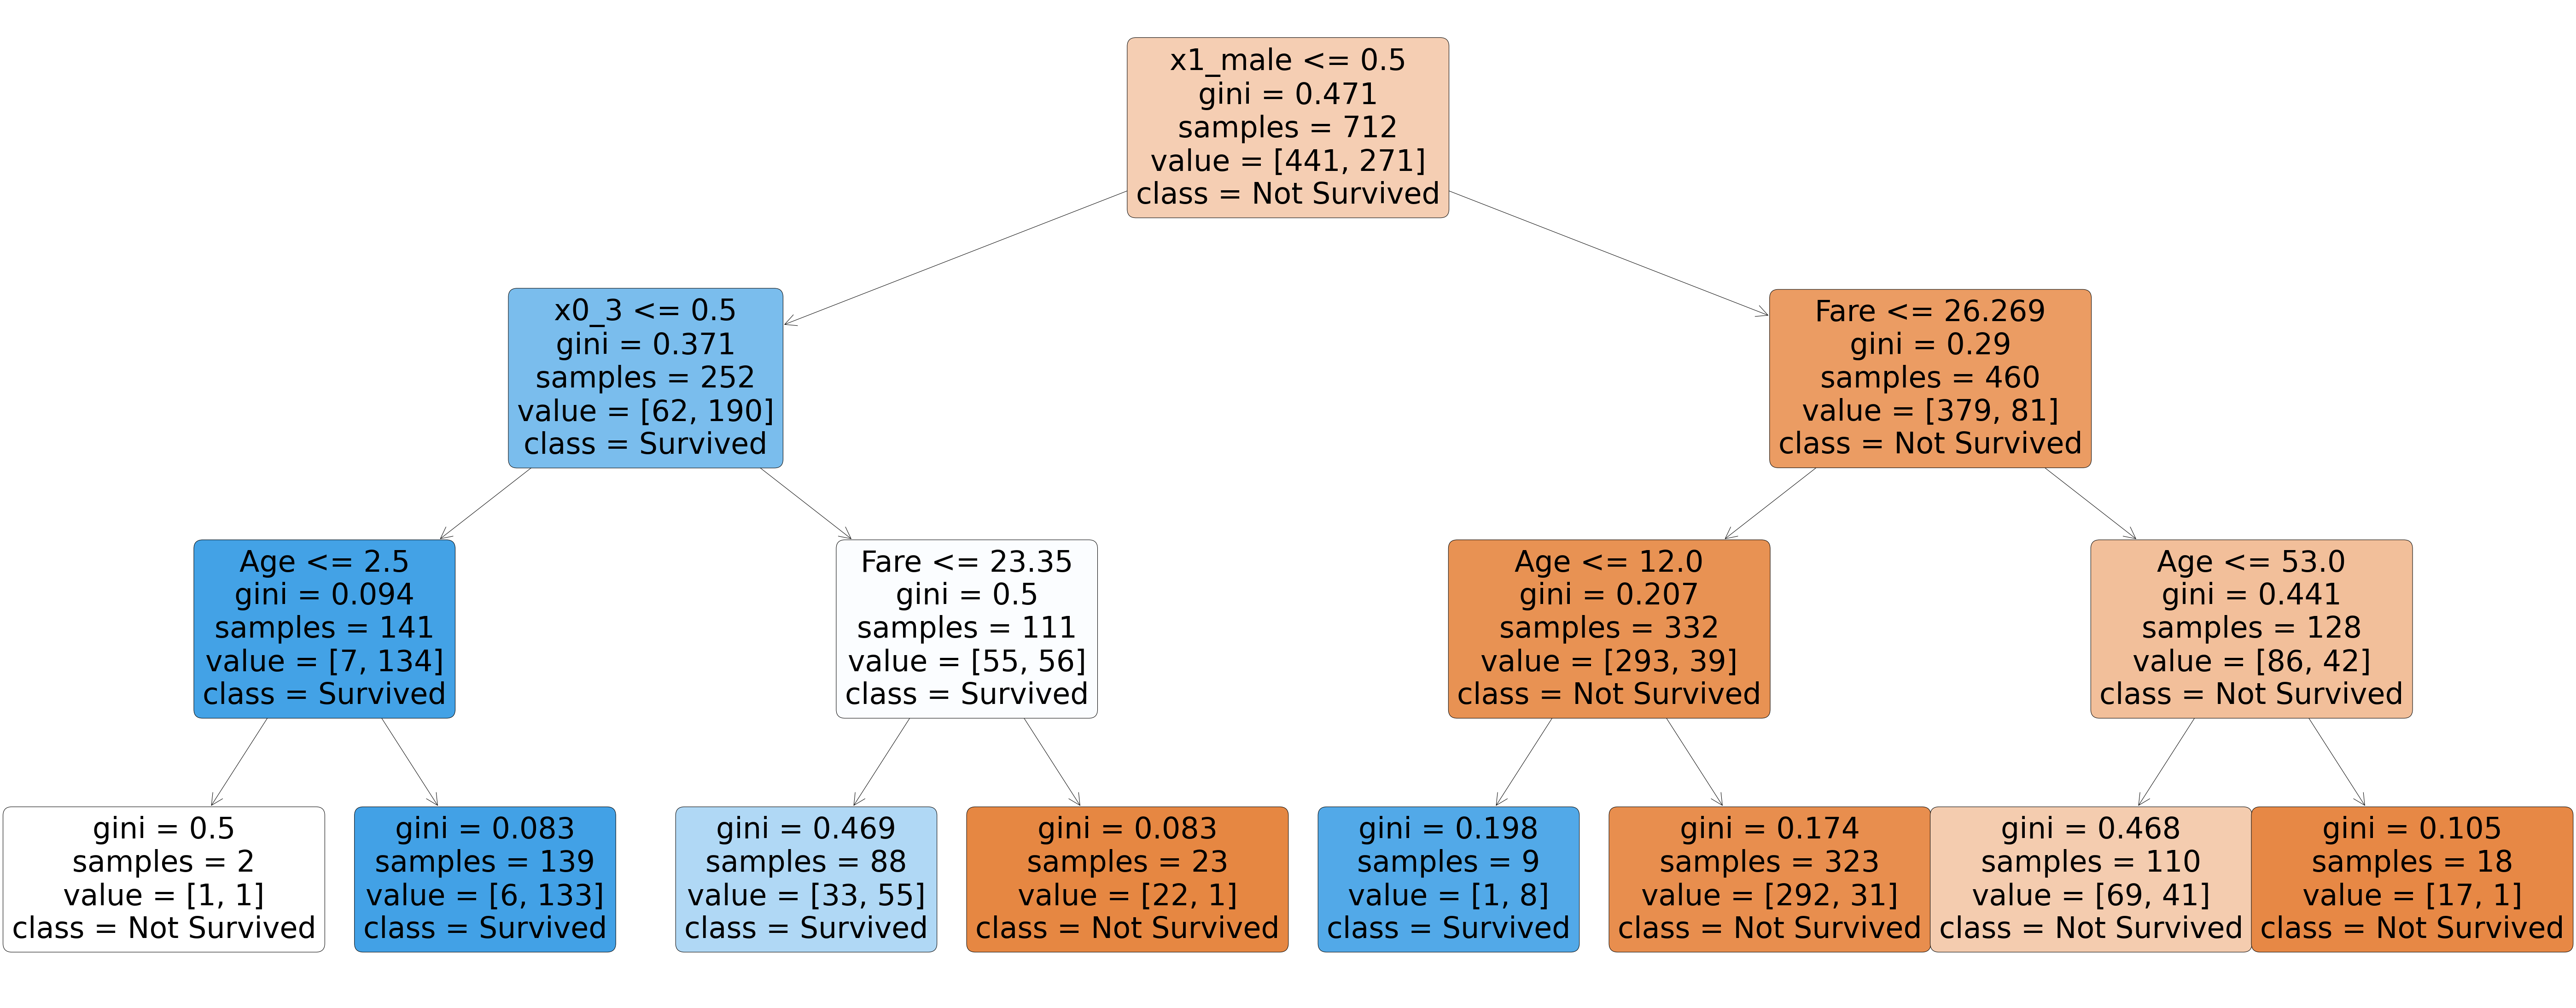

In [39]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
plt.figure(figsize=(100, 40))
plot_tree(
    tree,
    filled=True, 
    rounded=True, 
    class_names=['Not Survived', 'Survived'], 
    feature_names=X_train.columns
    );

## Test our model

In [40]:
# accuracy in train set
preds = tree.predict(X_train)
accuracy_score(preds, y_train)

0.8384831460674157

In [41]:
# accuracy in test set
preds = tree.predict(X_test)
acc_4th = accuracy_score(preds, y_test)
acc_4th

0.7597765363128491

# 6th iteration: scikit-learn pipeline

In [42]:
X = titanic.drop(columns=['Name','Ticket','Cabin','PassengerId','Survived'])
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
521,3,male,22.0,0,0,7.8958,S
753,3,male,23.0,0,0,7.8958,S
643,3,male,NaN,0,0,56.4958,S
332,1,male,38.0,0,1,153.4625,S
743,3,male,24.0,1,0,16.1000,S


## Preprocess: build our first sklean pipeline

In [43]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    # new scaling addition
    ('scale', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(drop='first', sparse=False))
])

In [44]:
num_col = ['Age','Fare','SibSp','Parch']

# example how ot apply a pipline
pd.DataFrame(numeric_pipeline.fit_transform(X_train[num_col]), columns=num_col) # select_dtypes() another option

,Age,Fare,SibSp,Parch
0,0.271174,0.015412,0.000,0.000000
1,0.283740,0.015412,0.000,0.000000
2,0.359135,0.110272,0.000,0.000000
3,0.472229,0.299539,0.000,0.166667
4,0.296306,0.031425,0.125,0.000000
...,...,...,...,...
663,0.233476,0.051302,0.000,0.333333
664,0.359135,0.050749,0.125,0.000000
665,0.359135,0.054107,0.125,0.000000
666,0.019854,0.050749,0.125,0.166667


In [45]:
cat_col = ['Pclass','Sex','Embarked']
num_col = ['Age','Fare','SibSp','Parch']

from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col)
])

pd.DataFrame(full_processor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8
0,0.271174,0.015412,0.000,0.000000,0.0,1.0,1.0,0.0,1.0
1,0.283740,0.015412,0.000,0.000000,0.0,1.0,1.0,0.0,1.0
2,0.359135,0.110272,0.000,0.000000,0.0,1.0,1.0,0.0,1.0
3,0.472229,0.299539,0.000,0.166667,0.0,0.0,1.0,0.0,1.0
4,0.296306,0.031425,0.125,0.000000,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
663,0.233476,0.051302,0.000,0.333333,0.0,0.0,0.0,0.0,1.0
664,0.359135,0.050749,0.125,0.000000,1.0,0.0,0.0,0.0,1.0
665,0.359135,0.054107,0.125,0.000000,1.0,0.0,1.0,0.0,0.0
666,0.019854,0.050749,0.125,0.166667,1.0,0.0,1.0,0.0,1.0


In [46]:
# we can even add a model into our scikit learn pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('model', DecisionTreeClassifier())
])
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare', 'SibSp',
                                                   'Parch']),
                                                 ('category',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(drop='first',
          

## Test sklearn pipline

In [47]:
accuracy_score(tree_pipeline.predict(X_train), y_train)

0.9790419161676647

In [48]:
preds = tree_pipeline.predict(X_test)
acc_5th = accuracy_score(preds, y_test)
acc_5th

0.7892376681614349

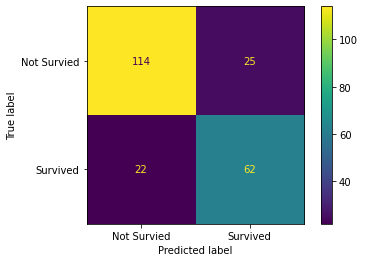

In [49]:
plot_confusion_matrix(tree_pipeline, X_test, y_test, display_labels=['Not Survied', 'Survived']);

# 7th iteration: Manual model tunning

## Preprocess (nice and clean code)

In [50]:
# numerical and categorical pipeline
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(drop='first', sparse=False))
])
# automating the column selection
cat_col = ['Pclass','Sex','Embarked']
num_col = ['Age','Fare','SibSp','Parch']
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col)
])

## Tunning our model

In [51]:
# adding the model in our pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('model', DecisionTreeClassifier(max_depth=4))
])
# fit our model to the train
tree_pipeline.fit(X_train, y_train)
accuracy_score(tree_pipeline.predict(X_train), y_train)

0.8488023952095808

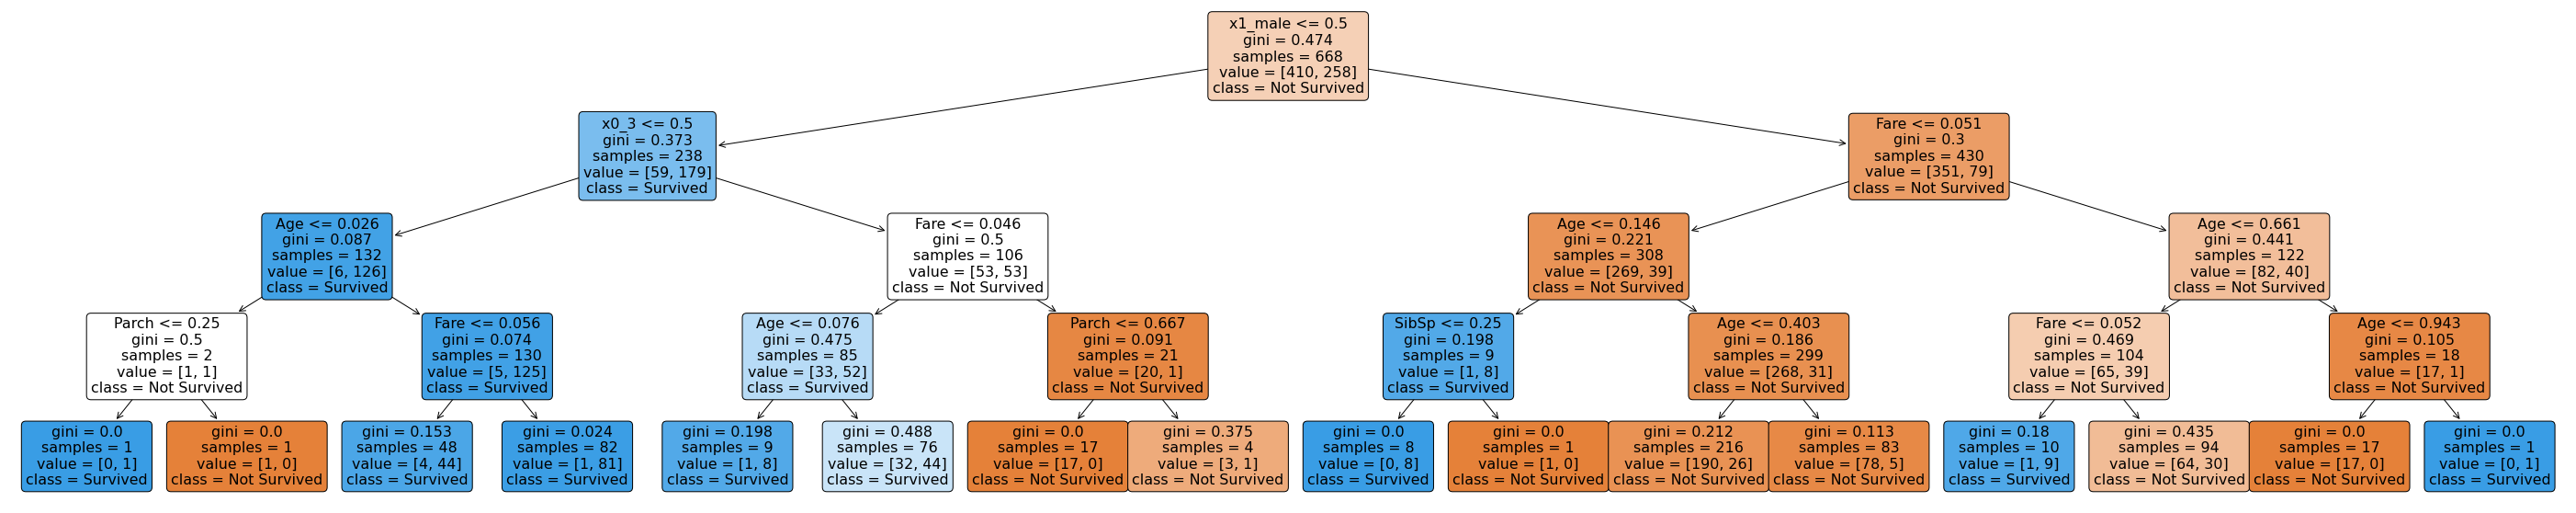

In [52]:
# get column names
col_names = num_col.copy()
col_names.extend(
    tree_pipeline.named_steps['preprocess'].transformers_[1][1].named_steps['one-hot'].get_feature_names()
)

plt.figure(figsize=(50, 10))
plot_tree(
    tree_pipeline['model'],
    filled=True, 
    rounded=True, 
    feature_names=col_names, 
    class_names=['Not Survived', 'Survived']
    );

## Test our model

In [53]:
preds = tree_pipeline.predict(X_test)
acc_6th = accuracy_score(preds, y_test)
acc_6th

0.7937219730941704

Text(0.5, 1.0, 'Accuracy evolution through iterations')

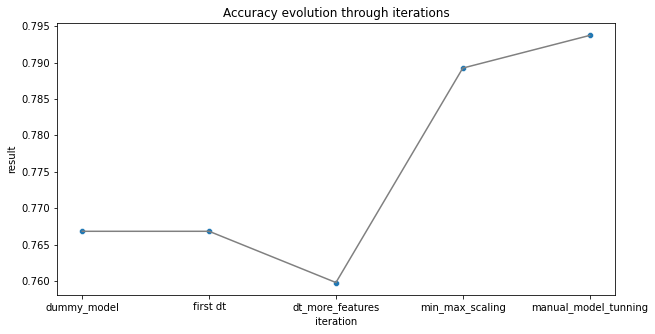

In [54]:
import seaborn as sns
# our we improving our model?
plt.subplots(figsize=(10, 5))
# ax = plt.axes()
results = pd.DataFrame({
    'iteration':['dummy_model', 'first dt', 'dt_more_features', 'min_max_scaling','manual_model_tunning'],
    'result':[acc_2nd, acc_3rd, acc_4th, acc_5th, acc_6th]
})
sns.lineplot(data=results, x='iteration', y='result', color='grey')
sns.scatterplot(data=results, x='iteration', y='result')
plt.title('Accuracy evolution through iterations')

# 8th iteration: Auto model tunning + Cross Validation

In [55]:
# numerical and categorical pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(drop='first', sparse=False))
])
# automating the column selection
cat_col = ['Pclass','Sex','Embarked']
num_col = ['Age','Fare','SibSp','Parch']
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col)
])

# adding the model in our pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('model', DecisionTreeClassifier())
])
# automating the search of the different parameters for our model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__max_depth': range(1, 8),
    'model__min_samples_leaf': range(1, 10),
    'model__min_samples_split': range(2, 10),
    'model__criterion':['gini','entropy']
    }
search = GridSearchCV(
    tree_pipeline, 
    param_grid, 
    cv=15,
    scoring='accuracy', 
    verbose=1, 
    refit=True, 
    n_jobs=-1
    )
# fit our model to the train
_ = search.fit(X_train, y_train)

Fitting 15 folds for each of 1008 candidates, totalling 15120 fits


In [56]:
search.best_params_

{'model__criterion': 'entropy',
 'model__max_depth': 6,
 'model__min_samples_leaf': 5,
 'model__min_samples_split': 2}

In [57]:
accuracy_score(search.predict(X_train), y_train)

0.8592814371257484

## Test our model

In [58]:
acc_7th = accuracy_score(search.predict(X_test), y_test)
acc_7th

0.8026905829596412

Text(0.5, 1.0, 'Accuracy evolution through iterations')

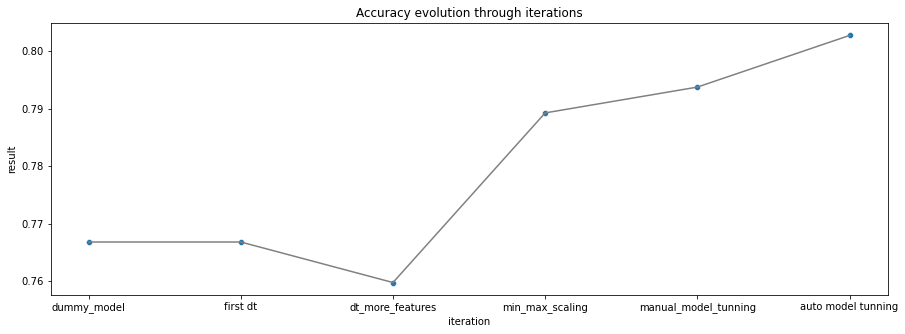

In [59]:
plt.subplots(figsize=(15, 5))

results = results.append({'iteration':'auto model tunning', 'result': acc_7th}, ignore_index=True)
sns.lineplot(data=results, x='iteration', y='result', color='grey')
sns.scatterplot(data=results, x='iteration', y='result')
plt.title('Accuracy evolution through iterations')

# 9th iteration: get status from name

## Train and test split

In [60]:
X = titanic.drop(columns=['Ticket','Cabin','PassengerId','Survived']) # 'Name' we are going to extract some information from it
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train.sample(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
596,2,"Leitch, Miss. Jessie Wills",female,NaN,0,0,33.0000,S
147,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,34.3750,S
63,3,"Skoog, Master. Harald",male,4.0,3,2,27.9000,S
714,2,"Greenberg, Mr. Samuel",male,52.0,0,0,13.0000,S
43,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,41.5792,C
136,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,26.2833,S
499,3,"Svensson, Mr. Olof",male,24.0,0,0,7.7958,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
103,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,8.6542,S
605,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,15.5500,S


## Pre processing: adding passenger status

### Understanding Count Vectorizer

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vect_name = vectorizer.fit_transform(X_train['Name'])
(
pd.DataFrame(
    vect_name.toarray(), 
    columns=vectorizer.get_feature_names()
    )
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .head(15)
)

,index,0
0,mr,422
1,miss,144
2,mrs,106
3,william,52
4,john,39
5,henry,30
6,master,25
7,charles,22
8,james,22
9,george,18


### Clean code

In [62]:
# numerical and categorical pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(drop='first', sparse=False))
])
# extract title from the name
status_egnineering = Pipeline(steps=[
    # will keep it at 7 to reduce the computational time
    ('status', CountVectorizer(max_features=7))
])
# automating the column selection
cat_col = ['Pclass','Sex','Embarked']
num_col = ['Age','Fare','SibSp','Parch']
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col),
    ('engineering', status_egnineering, 'Name')
])

# adding the model in our pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    ('model', DecisionTreeClassifier())
])
# automating the search of the different parameters for our model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__max_depth': range(1, 8),
    'model__min_samples_leaf': range(1, 10),
    'model__min_samples_split': range(2, 10),
    'model__criterion':['gini','entropy']
    }
search = GridSearchCV(
    tree_pipeline, 
    param_grid,
    cv=15, 
    scoring='accuracy',
    verbose=1,
    refit=True, 
    n_jobs=-1
    )
# fit our model to the train
_ = search.fit(X_train, y_train)
accuracy_score(search.predict(X_train), y_train)

Fitting 15 folds for each of 1008 candidates, totalling 15120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 3128 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 4928 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 7128 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 9728 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 12728 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 15120 out of 15120 | elapsed:  3.7min finished


0.8679775280898876

In [63]:
acc_8th = accuracy_score(search.predict(X_test), y_test)
acc_8th

0.776536312849162

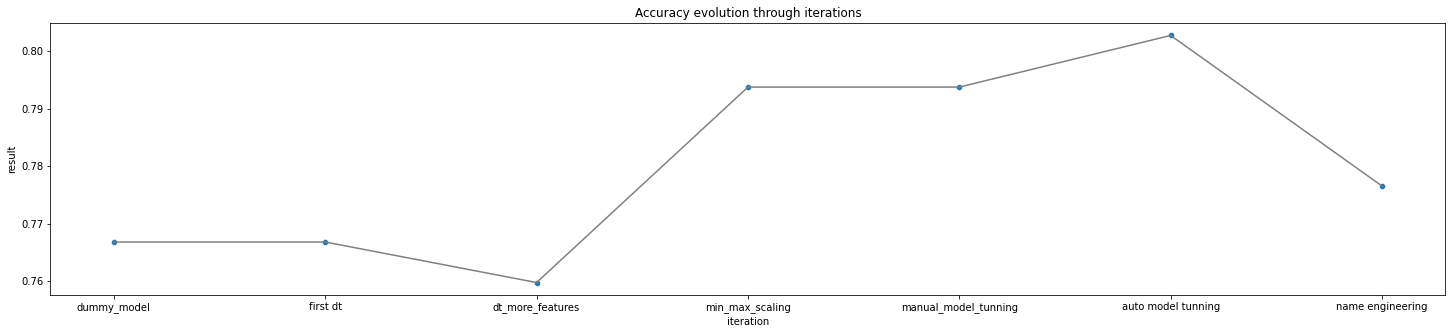

In [64]:
def plot_iterations_evolution(new_iteration_name, new_acc):
    global results
    results = results.append(
        {
            'iteration':new_iteration_name,
            'result': new_acc
        }, 
        ignore_index=True)
    plt.subplots(figsize=(25, 5))
    sns.lineplot(data=results, x='iteration', y='result', color='grey')
    sns.scatterplot(data=results, x='iteration', y='result')
    plt.title('Accuracy evolution through iterations')
    plt.show()

plot_iterations_evolution('name engineering', acc_8th)

## EXTRA: understanding feature importance in our model

Does not work current sklearn version in Kaggle
```python
cat_enc_col = (search
                .best_estimator_
                .named_steps['preprocess']
                .transformers_[1][1]
                .named_steps['one-hot']
                .get_feature_names()
                .tolist())
name_new_col = (search
                .best_estimator_
                .named_steps['preprocess']
                .transformers_[2][1]
                .get_feature_names()
                .tolist())

pd.DataFrame({
    'cols': num_col + cat_enc_col + name_new_col,
    'importance':search.best_estimator_.named_steps['model'].feature_importances_
}).sort_values('importance', ascending=False)
```

# 10th iteration: feature selection and error analysis

## Updateing our sklearn pipeline with `SelectFromModel` for feature selection

In [65]:
# numerical and categorical pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_impute', SimpleImputer(strategy='median')),
    ('scale', MinMaxScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(drop='first', sparse=False))
])
# extract title from the name
status_egnineering = Pipeline(steps=[
    # we will let our decision tree to select which are the important features
    ('status', CountVectorizer(max_features=40))
])
# automating the column selection
cat_col = ['Pclass','Sex','Embarked']
num_col = ['Age','Fare','SibSp','Parch']
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, num_col), 
    ('category', categorical_pipeline, cat_col),
    ('engineering', status_egnineering, 'Name')
])
# defining the parameters of our model based on previous cv
# (later on we can run again a gridsearch, but we want to speed up this process)
param_grid = {
    'criterion': 'entropy',
    'max_depth': 6,
    'min_samples_leaf': 5,
    'min_samples_split': 2
    }

from sklearn.feature_selection import SelectFromModel
# adding the model in our pipeline
tree_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    # using a normal decision tree to decide which features are important
    ('feature_selection', SelectFromModel(DecisionTreeClassifier())),
    ('model', DecisionTreeClassifier(**param_grid))
])
# automating the search of the different parameters for our model
# fit our model to the train
_ = tree_pipeline.fit(X_train, y_train)
accuracy_score(tree_pipeline.predict(X_train), y_train)

0.8623595505617978

### Undestanding our model

Does not work current sklearn version in Kaggle
```python
# get the feature names from our model
cat_enc_col = (
    tree_pipeline
    .named_steps['preprocess']
    .transformers_[1][1]
    .named_steps['one-hot']
    .get_feature_names()
    .tolist()
    )
name_new_col = (
    tree_pipeline
    .named_steps['preprocess']
    .transformers_[2][1]
    .get_feature_names()
    .tolist()
    )
# find out the names generated on the preprocessing
preprocess_col = num_col + cat_enc_col + name_new_col
# sklearn returns only the positions of these columns
selected_cols_pos = tree_pipeline.named_steps['feature_selection'].get_feature_names()
# find the name of the columns based on the position selcted with sklearn trasnformer `SelectFromModel`
feature_names = [preprocess_col[int(col_name.replace('x',''))] for col_name in selected_cols_pos]

plt.figure(figsize=(50, 10))
plot_tree(
    tree_pipeline['model'],
    filled=True, 
    rounded=True, 
    feature_names=feature_names, 
    class_names=['Not Survived', 'Survived']
    );
```

Does not work current sklearn version in Kaggle
```python
# looking at the feature importance
pd.DataFrame({
    'cols': feature_names,
    'importance':tree_pipeline.named_steps['model'].feature_importances_
}).sort_values('importance', ascending=False)
```

## Testing our model

In [66]:
acc_9th = accuracy_score(tree_pipeline.predict(X_test), y_test)
acc_9th

0.7988826815642458

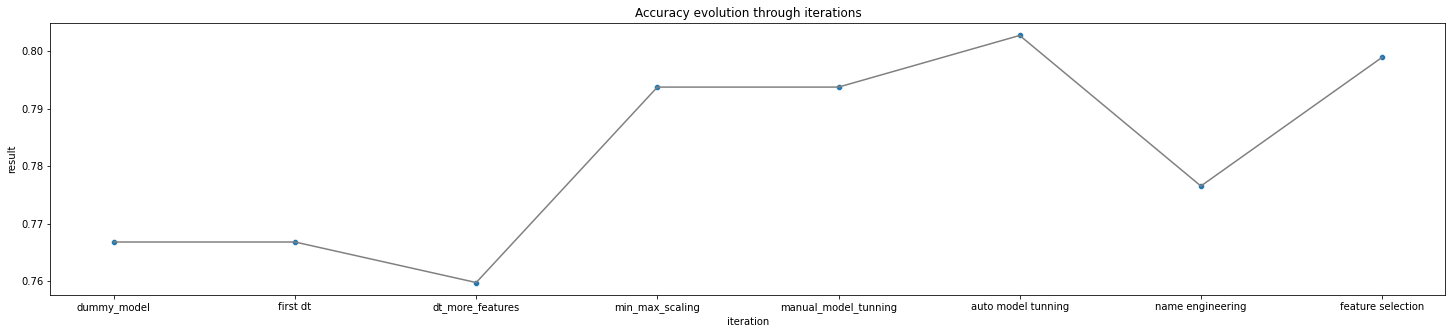

In [67]:
plot_iterations_evolution('feature selection', acc_9th)

## Error analyisis

Accuracy:  0.7988826815642458


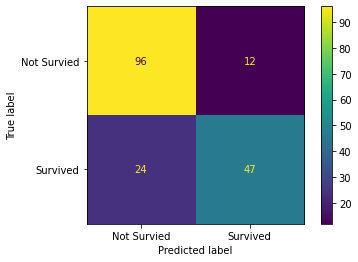

In [68]:
from sklearn.metrics import confusion_matrix

def model_check(y_true, y_preds, model):     
    print('Accuracy: ', accuracy_score(y_true, y_preds))
    classes = model.named_steps['model'].classes_    
    tn, fp, fn, tp = confusion_matrix(y_true, y_preds).ravel()
    plot_confusion_matrix(tree_pipeline, X_test, y_test, display_labels=['Not Survied', 'Survived']);
    return tn, fp, fn, tp
tn, fp, fn, tp = model_check(y_test, tree_pipeline.predict(X_test), tree_pipeline)

In [69]:
47 / (24 + 47)

0.6619718309859155

In [70]:
from sklearn.metrics import precision_score, recall_score, cohen_kappa_score, f1_score
print(f"""
    Accuracy: {accuracy_score(tree_pipeline.predict(X_test), y_test)}
    Recall/Sensitivity: {recall_score(tree_pipeline.predict(X_test), y_test)}
    Precision (True Positive Rate): {precision_score(tree_pipeline.predict(X_test), y_test)}
    Specifity (False Positive Rate): {tn / (tn+fp)}
    F Score: {f1_score(tree_pipeline.predict(X_test), y_test)}
    Kappa: {cohen_kappa_score(tree_pipeline.predict(X_test), y_test)}
""")


    Accuracy: 0.7988826815642458
    Recall/Sensitivity: 0.7966101694915254
    Precision (True Positive Rate): 0.6619718309859155
    Specifity (False Positive Rate): 0.8888888888888888
    F Score: 0.7230769230769231
    Kappa: 0.5672844480257857



#### Understanding where the errors are commoing from

Our main problem is on the people that has survived, but in reality we are predicting them as not survived. Let's do a further exploration on the survival group: 

In [71]:
X_train_preds = X_train.copy()

X_train_errors = (
    X_train_preds
    .assign(
        preds = tree_pipeline.predict(X_train),
        true = y_train
        )
    .query('true == 1')
)
X_train_errors.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,preds,true
387,2,"Buss, Miss. Kate",female,36.0,0,0,13.0000,S,1,1
823,3,"Moor, Mrs. (Beila)",female,27.0,0,1,12.4750,S,0,1
740,1,"Hawksford, Mr. Walter James",male,NaN,0,0,30.0000,S,0,1
345,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,13.0000,S,1,1
318,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,164.8667,S,1,1


Does not work current sklearn version in Kaggle
```python
tree_error = DecisionTreeClassifier()
_ = tree_pipeline.fit(X_train_errors.drop(columns=['preds','true']), X_train_errors['preds'])
# get the feature names from our model
cat_enc_col = (
    tree_pipeline
    .named_steps['preprocess']
    .transformers_[1][1]
    .named_steps['one-hot']
    .get_feature_names()
    .tolist()
    )
name_new_col = (
    tree_pipeline
    .named_steps['preprocess']
    .transformers_[2][1]
    .get_feature_names()
    .tolist()
    )
# find out the names generated on the preprocessing
preprocess_col = num_col + cat_enc_col + name_new_col
# sklearn returns only the positions of these columns
selected_cols_pos = tree_pipeline.named_steps['feature_selection'].get_feature_names()
# find the name of the columns based on the position selcted with sklearn trasnformer `SelectFromModel`
feature_names = [preprocess_col[int(col_name.replace('x',''))] for col_name in selected_cols_pos]

plt.figure(figsize=(50, 10))
plot_tree(
    tree_pipeline['model'],
    filled=True, 
    rounded=True, 
    feature_names=feature_names, 
    class_names=['Not Survived', 'Survived']
    );
```

We already know that all this observations should be predicted as Sruvived, the question is to understand which are the factors that leads our decision tree to labale them as Not Survived. Here we can see the main factors: 

* When you are a male and you paid a high fare
* When you are a male and your paid a really low fare but your are old

# 11th iteration: KNN

In [72]:
# from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
# adding the model in our pipeline
knn_pipeline = Pipeline(steps=[
    ('preprocess', full_processor), 
    # using a normal decision tree to decide which features are important
    ('feature_selection', SelectFromModel(DecisionTreeClassifier())),
    ('model', KNeighborsClassifier())
])

# automating the search of the different parameters for our model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__n_neighbors': range(1, 10),
    'model__weights': ['uniform', 'distance'],
    'model__p': [1,2]
    }
search = GridSearchCV(
    knn_pipeline, 
    param_grid,
    cv=15, 
    scoring='accuracy',
    verbose=1,
    refit=True, 
    n_jobs=-1
    )
# fit our model to the train
_ = search.fit(X_train, y_train)
accuracy_score(search.predict(X_train), y_train)

Fitting 15 folds for each of 36 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 533 out of 540 | elapsed:   10.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   10.4s finished


0.848314606741573

In [73]:
acc_10th = accuracy_score(search.predict(X_test), y_test)
acc_10th

0.8100558659217877

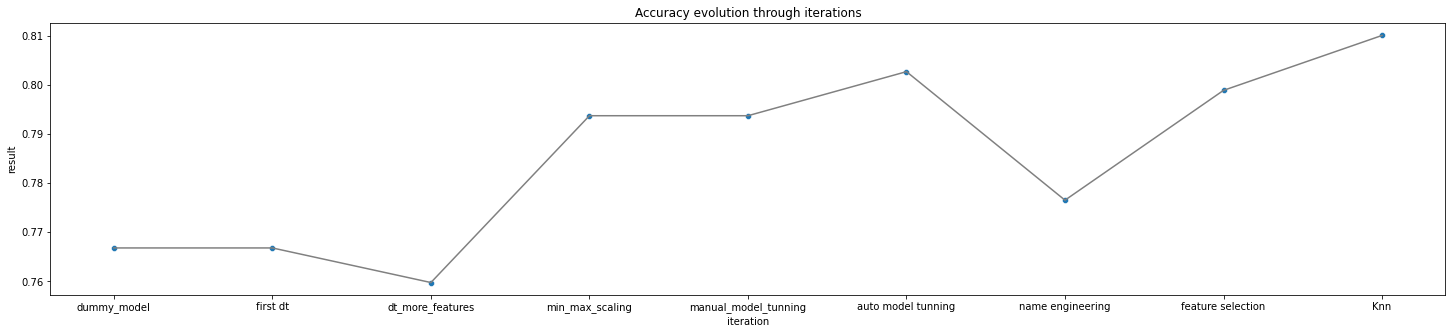

In [74]:
plot_iterations_evolution('Knn', acc_10th)